# **Load & Explore the Dataset**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "restaurant_analytics_data_large.csv"
df = pd.read_csv(file_path)

# Show basic info
print(df.info())
print(df.head())

# Checking for missing values
print(df.isnull().sum())

print(df.dtypes)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Order_ID                          10000 non-null  int64  
 1   Customer_ID                       10000 non-null  int64  
 2   Order_Time                        10000 non-null  object 
 3   Day_of_Week                       10000 non-null  object 
 4   Weather_Condition                 10000 non-null  object 
 5   Temperature_C                     10000 non-null  int64  
 6   Menu_Item                         10000 non-null  object 
 7   Category                          10000 non-null  object 
 8   Price                             10000 non-null  float64
 9   Delivery_Time_Minutes             10000 non-null  int64  
 10  Dine_In_or_Takeaway               10000 non-null  object 
 11  Customer_Satisfaction_Rating      10000 non-null  int64  
 12  Total

# **Data Cleaning & Preprocessing**

In [13]:
# Rename columns to lowercase and replace spaces with underscores for consistency
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# Convert 'Order_Time' to datetime
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')

# Handle missing values
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify data after processing
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Order_ID                          10000 non-null  int64         
 1   Customer_ID                       10000 non-null  int64         
 2   Order_Time                        10000 non-null  datetime64[ns]
 3   Day_of_Week                       10000 non-null  object        
 4   Weather_Condition                 10000 non-null  object        
 5   Temperature_C                     10000 non-null  int64         
 6   Menu_Item                         10000 non-null  object        
 7   Category                          10000 non-null  object        
 8   Price                             10000 non-null  float64       
 9   Delivery_Time_Minutes             10000 non-null  int64         
 10  Dine_In_or_Takeaway               10000 non-nul

# **Exploratory Data Analysis**

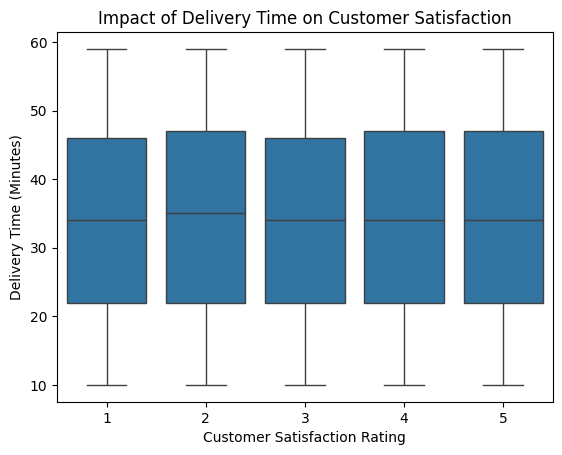

In [14]:


sns.boxplot(x=df['Customer_Satisfaction_Rating'], y=df['Delivery_Time_Minutes'])
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Impact of Delivery Time on Customer Satisfaction")
plt.show()


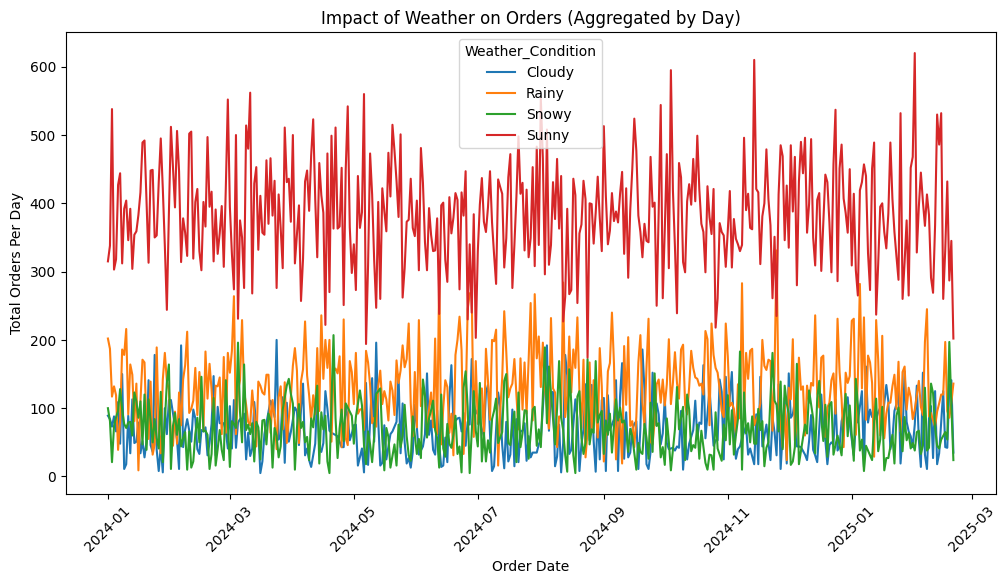

In [6]:

# Aggregate data to daily level
df['Order_Date'] = df['Order_Time'].dt.date  # Extract only the date
daily_orders = df.groupby(['Order_Date', 'Weather_Condition'])['Total_Orders_Per_Hour'].sum().reset_index()

# Plot the improved line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Date', y='Total_Orders_Per_Hour', hue='Weather_Condition', data=daily_orders)
plt.xlabel("Order Date")
plt.ylabel("Total Orders Per Day")
plt.title("Impact of Weather on Orders (Aggregated by Day)")
plt.xticks(rotation=45)
plt.show()


Index(['Order_ID', 'Customer_ID', 'Order_Time', 'Day_of_Week',
       'Weather_Condition', 'Temperature_C', 'Menu_Item', 'Category', 'Price',
       'Delivery_Time_Minutes', 'Dine_In_or_Takeaway',
       'Customer_Satisfaction_Rating', 'Total_Orders_Per_Hour',
       'Staff_On_Duty', 'Table_Occupancy_Rate',
       'Kitchen_Preparation_Time_Minutes', 'Total_Revenue', 'Peak_Hours',
       'Promotions_Applied', 'Delivery_Platform_Used', 'Online_vs_Walkin',
       'Holiday_or_Event', 'Order_Date'],
      dtype='object')


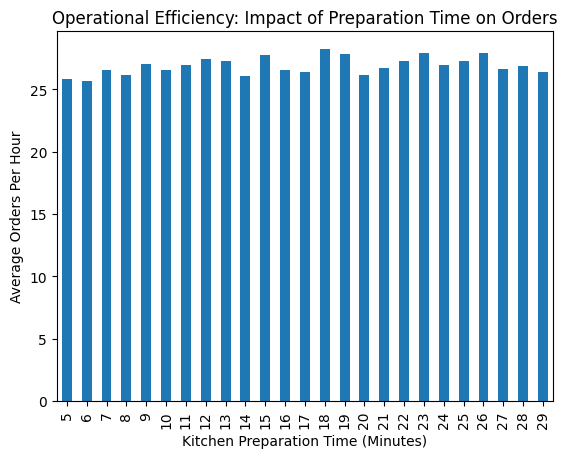

In [7]:
# Check available columns
print(df.columns)

# Use the correct column names
df.groupby('Kitchen_Preparation_Time_Minutes')['Total_Orders_Per_Hour'].mean().plot(kind='bar')

plt.xlabel("Kitchen Preparation Time (Minutes)")
plt.ylabel("Average Orders Per Hour")
plt.title("Operational Efficiency: Impact of Preparation Time on Orders")
plt.show()


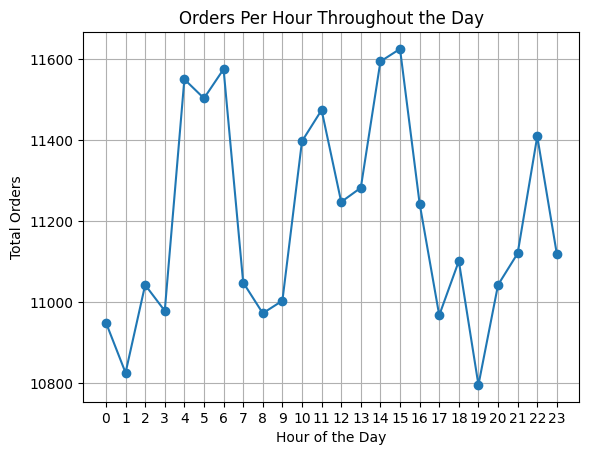

In [8]:
# Ensure Order_Time is in datetime format
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors='coerce')

# Extract the hour from Order_Time
df['hour'] = df['Order_Time'].dt.hour

# Group by hour and plot total orders per hour
df.groupby('hour')['Total_Orders_Per_Hour'].sum().plot(kind='line', marker='o')

plt.xlabel("Hour of the Day")
plt.ylabel("Total Orders")
plt.title("Orders Per Hour Throughout the Day")
plt.xticks(range(0, 24))  # Ensure all 24 hours are displayed
plt.grid()
plt.show()


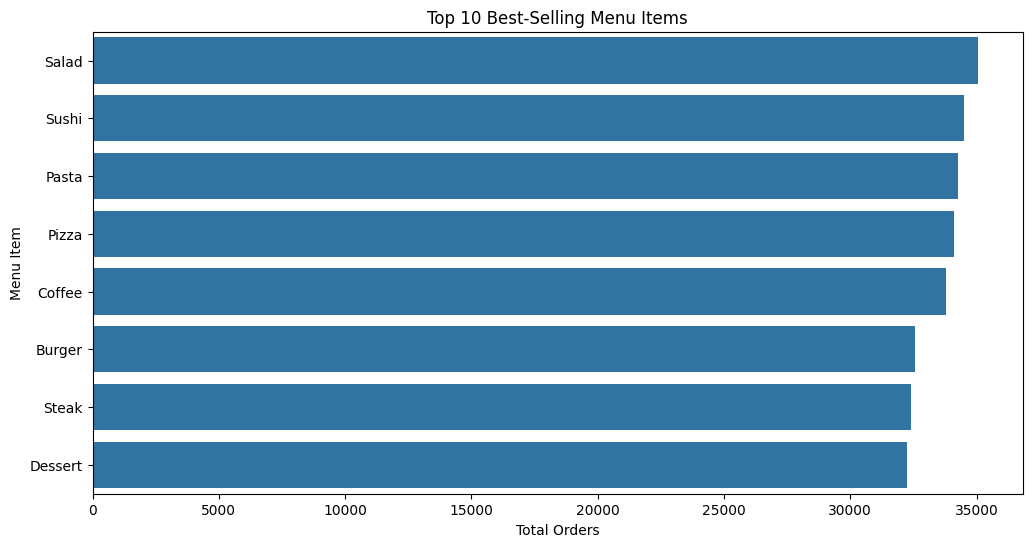

In [9]:


# Aggregate sales data for each menu item
menu_performance = df.groupby('Menu_Item').agg({
    'Total_Orders_Per_Hour': 'sum',
    'Price': 'mean',
    'Customer_Satisfaction_Rating': 'mean'
}).reset_index()

# Sort by total orders
menu_performance = menu_performance.sort_values(by='Total_Orders_Per_Hour', ascending=False)

# Bar plot for top-selling menu items
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Orders_Per_Hour', y='Menu_Item', data=menu_performance.head(10))
plt.xlabel("Total Orders")
plt.ylabel("Menu Item")
plt.title("Top 10 Best-Selling Menu Items")
plt.show()


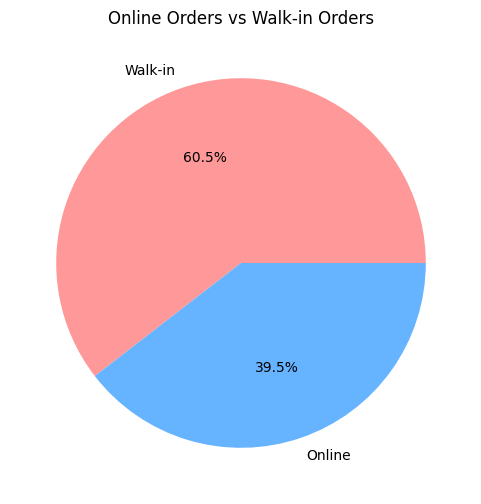

In [10]:
# Count total orders from each platform
delivery_vs_walkin = df['Online_vs_Walkin'].value_counts()

# Pie chart to compare order types
plt.figure(figsize=(6, 6))
plt.pie(delivery_vs_walkin, labels=delivery_vs_walkin.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Online Orders vs Walk-in Orders")
plt.show()


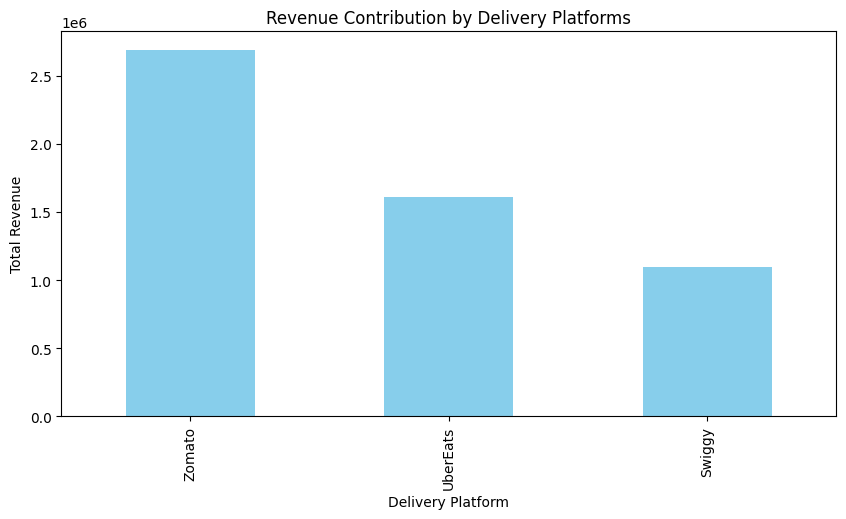

In [21]:
# Revenue contribution by each platform
platform_revenue = df.groupby('Delivery_Platform_Used')['Total_Revenue'].sum().sort_values(ascending=False)

# Bar chart for revenue by platform
plt.figure(figsize=(10, 5))
platform_revenue.plot(kind='bar', color='skyblue')
plt.xlabel("Delivery Platform")
plt.ylabel("Total Revenue")
plt.title("Revenue Contribution by Delivery Platforms")
plt.show()


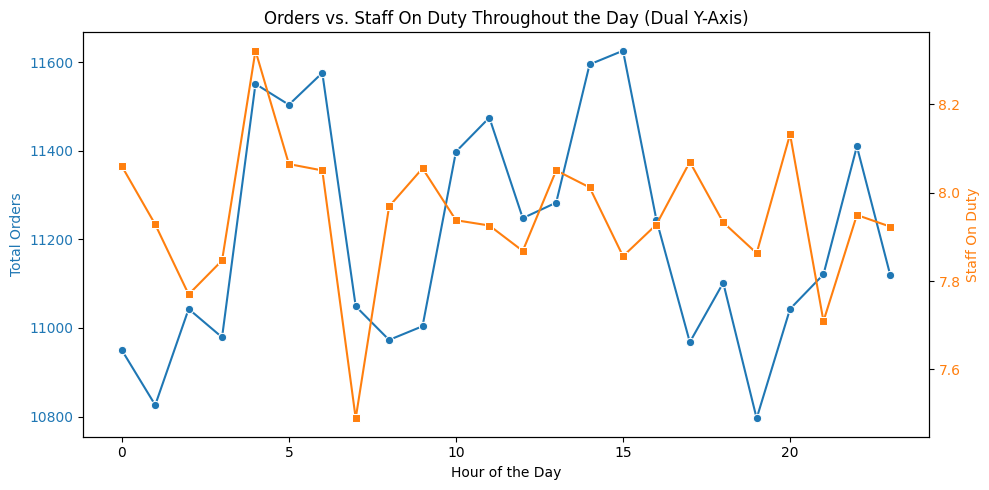

In [11]:

# Aggregate orders and staff on duty per hour
hourly_data = df.groupby('hour').agg({
    'Total_Orders_Per_Hour': 'sum',
    'Staff_On_Duty': 'mean'  # Average staff count per hour
}).reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot total orders on primary y-axis
color = 'tab:blue'
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("Total Orders", color=color)
sns.lineplot(x='hour', y='Total_Orders_Per_Hour', data=hourly_data, color=color, marker="o", ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis for staff on duty
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel("Staff On Duty", color=color)
sns.lineplot(x='hour', y='Staff_On_Duty', data=hourly_data, color=color, marker="s", ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Final formatting
plt.title("Orders vs. Staff On Duty Throughout the Day (Dual Y-Axis)")
fig.tight_layout()
plt.show()
